## Objective
Find the mean and standard deviation of synthetic samples
The model expects this type of data, so other data needs to be scaled to this

In [1]:
%load_ext autoreload
%autoreload

import sys
PATH = "/data/MEAprojects/DLSpikeSorter"
if PATH not in sys.path:
    sys.path.append(PATH)

import matplotlib.pyplot as plt
import torch
from tqdm import tqdm
import numpy as np

from src.data import RecordingCrossVal
from src import utils

#### For synthetic dataset

In [8]:
rec_cross_val = RecordingCrossVal(sample_size=200, front_buffer=40, end_buffer=40,
                                  num_wfs_probs=[0.6, 0.24, 0.12, 0.04], isi_wf_min=5, isi_wf_max=None,
                                  thresh_amp=3, thresh_std=0.6,
                                  samples_per_waveform=20, as_datasets=True,
                                  device="cpu", mmap_mode="r",
                                  batch_size=1)

In [41]:
rec, train, val = rec_cross_val["5118"]

In [42]:
utils.random_seed(123)

means = []
stds = []
N=2  # 1.38
for _ in range(N):
    for trace, num_wf, wf_locs, wf_alphas in tqdm(train):
        means.append(torch.mean(trace).item())
        stds.append(torch.std(trace).item())

Using random seed 123


9890it [00:06, 1540.10it/s]                          
9890it [00:06, 1596.23it/s]                          


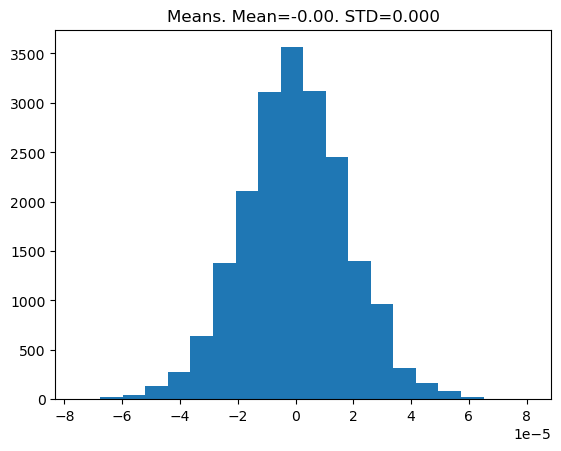

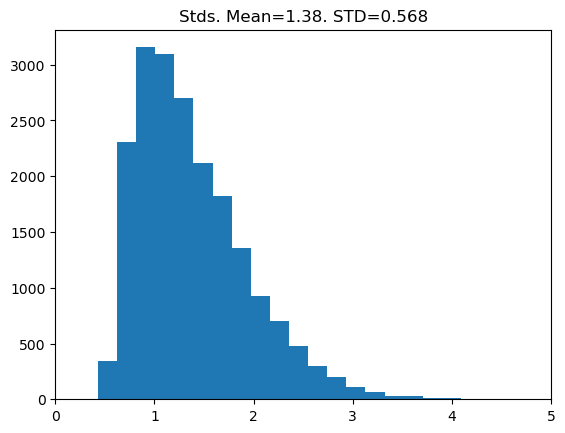

In [43]:
plt.title(f"Means. Mean={np.mean(means):.2f}. STD={np.std(means):.3f}")
plt.hist(means, bins=20)
plt.show()

plt.title(f"Stds. Mean={np.mean(stds):.2f}. STD={np.std(stds):.3f}")
plt.hist(stds, bins=80)
plt.xlim(0, 5)
plt.show()

#### For real organoid data

In [35]:
rec_windows = np.load("/data/MEAprojects/DLSpikeSorter/5118/windows_200_120.npy", mmap_mode="r")

In [46]:
utils.random_seed(215)

windows_ind = np.random.choice(len(rec_windows), N*len(train))
windows = rec_windows[windows_ind, 0, :]
means = np.mean(windows, axis=1)
stds = np.std(windows, axis=1)

Using random seed 215


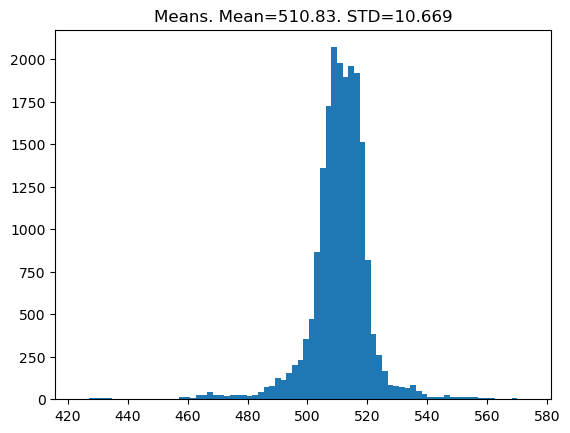

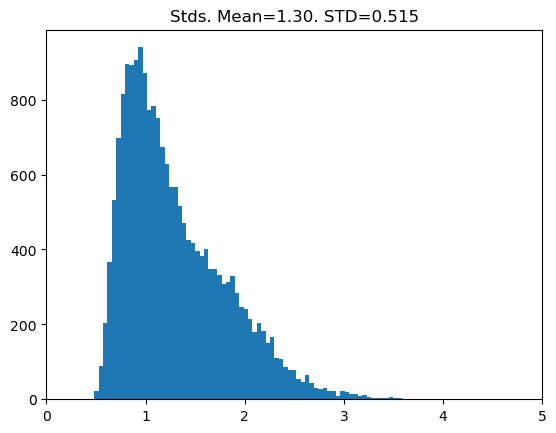

In [49]:
plt.title(f"Means. Mean={np.mean(means):.2f}. STD={np.std(means):.3f}")
plt.hist(means, bins=80)
plt.show()

plt.title(f"Stds. Mean={np.mean(stds):.2f}. STD={np.std(stds):.3f}")
plt.hist(stds, bins=80)
plt.xlim(0, 5)
plt.show()

#### For rat data

In [50]:
rec_windows = np.load("/data/MEAprojects/dandi/000034/sub-mouse412804/dl_spike_sorter/windows_200_120.npy", mmap_mode="r")

In [51]:
utils.random_seed(215)

windows_ind = np.random.choice(len(rec_windows), N*len(train))
windows = rec_windows[windows_ind, 0, :]
means = np.mean(windows, axis=1)
stds = np.std(windows, axis=1)

Using random seed 215


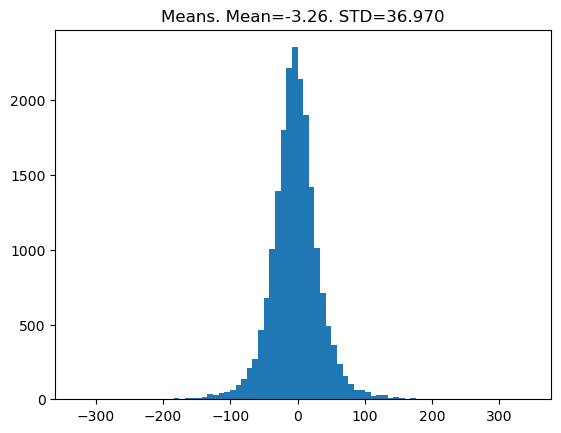

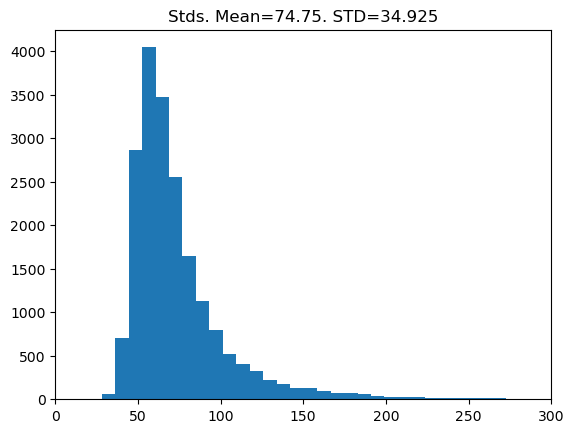

In [55]:
plt.title(f"Means. Mean={np.mean(means):.2f}. STD={np.std(means):.3f}")
plt.hist(means, bins=80)
plt.show()

plt.title(f"Stds. Mean={np.mean(stds):.2f}. STD={np.std(stds):.3f}")
plt.hist(stds, bins=80)
plt.xlim(0, 300)
plt.show()